In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('India_emissions.csv')
df

,Country,Code,Year,Emissions (tonnes )
0,India,IND,2000,1029637759
1,India,IND,2001,1035640714
2,India,IND,2002,1047595651
3,India,IND,2003,1091873009
4,India,IND,2004,1145545234
5,India,IND,2005,1210145667
6,India,IND,2006,1287149211
7,India,IND,2007,1390253491
8,India,IND,2008,1547991039
9,India,IND,2009,1720120560


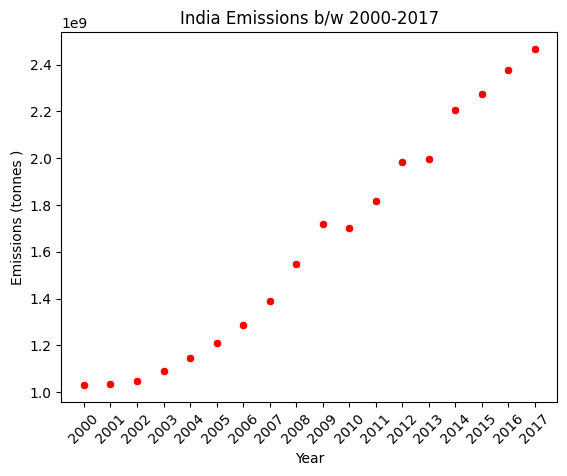

In [12]:
sns.scatterplot(x='Year',y='Emissions (tonnes )',data=df,color='red')
plt.xticks(ticks=df['Year'], labels=df['Year'], rotation=45) 
plt.title('India Emissions b/w 2000-2017')
plt.show()

# Train and Test Data

In [16]:
X=df[['Year']]
Y=df['Emissions (tonnes )']

In [17]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
obj=LinearRegression()
obj.fit(X_train,Y_train)
obj.score(X_test,Y_test)

0.9421719447274604

In [26]:
obj.predict([[2017]])

C:\Users\ABHAY\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.40384422e+09])

In [27]:
df[df['Year']==2017]

,Country,Code,Year,Emissions (tonnes )
17,India,IND,2017,2466765373


In [40]:
data=obj.predict(df[['Year']])
data

array([9.08287636e+08, 9.96261553e+08, 1.08423547e+09, 1.17220939e+09,
       1.26018330e+09, 1.34815722e+09, 1.43613114e+09, 1.52410505e+09,
       1.61207897e+09, 1.70005289e+09, 1.78802680e+09, 1.87600072e+09,
       1.96397464e+09, 2.05194855e+09, 2.13992247e+09, 2.22789639e+09,
       2.31587031e+09, 2.40384422e+09])

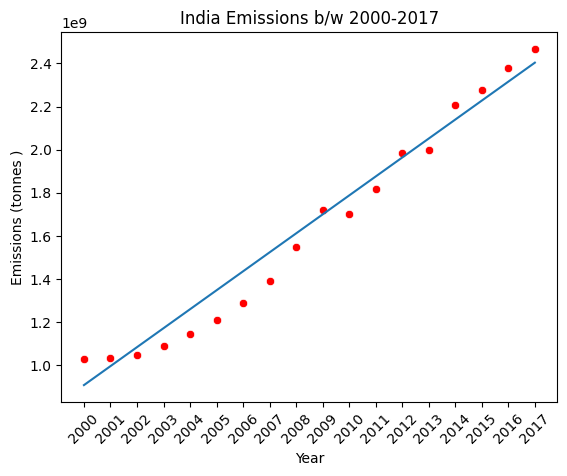

In [39]:
sns.scatterplot(x='Year',y='Emissions (tonnes )',data=df,color='red')
plt.xticks(ticks=df['Year'], labels=df['Year'], rotation=45) 
plt.title('India Emissions b/w 2000-2017')
sns.lineplot(x=df.Year,y=data)
plt.show()

In [61]:
obj.predict([[2018]])

C:\Users\ABHAY\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.49181814e+09])

In [62]:
future_years=np.arange(2018,2026).reshape(-1,1)
predicted=obj.predict(future_years)
predicted

C:\Users\ABHAY\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.49181814e+09, 2.57979206e+09, 2.66776597e+09, 2.75573989e+09,
       2.84371381e+09, 2.93168772e+09, 3.01966164e+09, 3.10763556e+09])

In [63]:
Years=[2018,2019,2020,2021,2022,2023,2024,2025]
predicted=pd.DataFrame({'Year':Years,'Emissions (tonnes )':predicted})
predicted

,Year,Emissions (tonnes )
0,2018,2.491818e+09
1,2019,2.579792e+09
2,2020,2.667766e+09
3,2021,2.755740e+09
4,2022,2.843714e+09
5,2023,2.931688e+09
6,2024,3.019662e+09
7,2025,3.107636e+09


In [65]:
df_new=df[['Year','Emissions (tonnes )']]
combined_df = pd.concat([df_new, predicted],ignore_index=True)
combined_df

,Year,Emissions (tonnes )
0,2000,1.029638e+09
1,2001,1.035641e+09
2,2002,1.047596e+09
3,2003,1.091873e+09
4,2004,1.145545e+09
5,2005,1.210146e+09
6,2006,1.287149e+09
7,2007,1.390253e+09
8,2008,1.547991e+09
9,2009,1.720121e+09


In [ ]:
sns.scatterplot(x='Year',y='Emissions (tonnes )',data=combined_df,color='red')
plt.xticks(ticks=combined_df['Year'], labels=combined_df['Year'], rotation=45) 
plt.title('India Emissions b/w 2000-2025')
sns.lineplot(x=combined_df.Year,y=data)
plt.show()